# Install and Import Library

In [1]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

In [2]:
!pip list

Package                      Version
---------------------------- ---------
absl-py                      1.3.0
astunparse                   1.6.3
backcall                     0.2.0
cachetools                   5.2.0
certifi                      2022.6.15
charset-normalizer           2.1.1
cycler                       0.11.0
debugpy                      1.5.1
decorator                    5.1.1
entrypoints                  0.4
flatbuffers                  22.11.23
fonttools                    4.38.0
gast                         0.4.0
google-auth                  2.14.1
google-auth-oauthlib         0.4.6
google-pasta                 0.2.0
grpcio                       1.51.1
h5py                         3.7.0
idna                         3.4
importlib-metadata           5.1.0
ipykernel                    6.9.1
ipython                      7.31.1
jedi                         0.18.1
jupyter-client               7.2.2
jupyter-core                 4.10.0
keras                        2.11.0
kiw

In [3]:
import os
import cv2
import imghdr

import tensorflow as tf
import numpy as np

from matplotlib import pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
from tensorflow.keras.models import load_model

2022-12-01 13:35:04.753545: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-01 13:35:04.821017: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-12-01 13:35:05.117918: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/ocsb-aiserver/anaconda3/envs/machine/lib/python3.7/site-packages/cv2/../../lib64:/usr/local/

In [4]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

2022-12-01 13:35:05.682093: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-01 13:35:05.686695: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudnn.so.8'; dlerror: libcudnn.so.8: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/ocsb-aiserver/anaconda3/envs/machine/lib/python3.7/site-packages/cv2/../../lib64:/usr/local/cuda-11.3/lib64:/usr/local/cuda-11.3/lib64:/usr/local/cuda-11.3/lib64:/usr/local/cuda-11.2/lib64
2022-12-01 13:35:05.686706: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1934] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the

In [5]:
tf.config.list_physical_devices('GPU')

[]

# Setting Path and Load Data

In [6]:
data_dir = 'DATA_PATH'

In [7]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [8]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

In [9]:
data = tf.keras.utils.image_dataset_from_directory('DATA_PATH')

Found 305 files belonging to 2 classes.


2022-12-01 13:35:07.999128: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [10]:
data_iterator = data.as_numpy_iterator()

In [11]:
batch = data_iterator.next()

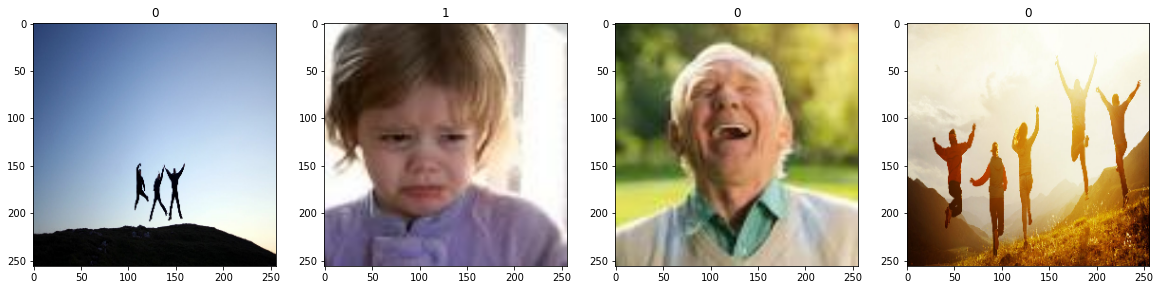

In [12]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# Scaling Data

In [13]:
data = data.map(lambda x,y: (x/255, y))

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [14]:
data.as_numpy_iterator().next()

(array([[[[0.9372549 , 0.8627451 , 0.74509805],
          [0.9372549 , 0.8627451 , 0.74509805],
          [0.9389399 , 0.8644301 , 0.7467831 ],
          ...,
          [0.9843137 , 0.9137255 , 0.75686276],
          [0.9843137 , 0.9137255 , 0.75686276],
          [0.9843137 , 0.9137255 , 0.75686276]],
 
         [[0.9372549 , 0.8627451 , 0.74509805],
          [0.9377446 , 0.8632348 , 0.74558777],
          [0.94002324, 0.86551344, 0.7478664 ],
          ...,
          [0.9843137 , 0.9137255 , 0.75686276],
          [0.9843137 , 0.9137255 , 0.75686276],
          [0.9843137 , 0.9137255 , 0.75686276]],
 
         [[0.93780637, 0.86329657, 0.7456495 ],
          [0.9386752 , 0.8641654 , 0.7465184 ],
          [0.9414134 , 0.8669036 , 0.74925655],
          ...,
          [0.9848652 , 0.91427696, 0.7574142 ],
          [0.9848652 , 0.91427696, 0.7574142 ],
          [0.9848652 , 0.91427696, 0.7574142 ]],
 
         ...,
 
         [[0.18486519, 0.15012255, 0.08235294],
          [0.18514

# Setup Data Test

In [15]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [16]:
train_size

7

In [17]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [18]:
train

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [19]:
val

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [20]:
test

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

# Build Deep Learning Model

In [21]:
model = Sequential()

In [22]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [23]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

# Training

In [25]:
logdir='logs'

In [26]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [27]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
7/7 [==============================] - 2s 199ms/step - loss: 1.3611 - accuracy: 0.4732 - val_loss: 0.6069 - val_accuracy: 0.7188
Epoch 2/20
7/7 [==============================] - 2s 186ms/step - loss: 0.6823 - accuracy: 0.5625 - val_loss: 0.6450 - val_accuracy: 0.7031
Epoch 3/20
7/7 [==============================] - 2s 186ms/step - loss: 0.6357 - accuracy: 0.6518 - val_loss: 0.5794 - val_accuracy: 0.7500
Epoch 4/20
7/7 [==============================] - 2s 189ms/step - loss: 0.5802 - accuracy: 0.7054 - val_loss: 0.6146 - val_accuracy: 0.5938
Epoch 5/20
7/7 [==============================] - 2s 185ms/step - loss: 0.4920 - accuracy: 0.7902 - val_loss: 0.4925 - val_accuracy: 0.7656
Epoch 6/20
7/7 [==============================] - 2s 182ms/step - loss: 0.4265 - accuracy: 0.8304 - val_loss: 0.3209 - val_accuracy: 0.9219
Epoch 7/20
7/7 [==============================] - 2s 187ms/step - loss: 0.3632 - accuracy: 0.8527 - val_loss: 0.3117 - val_accuracy: 0.8750
Epoch 8/20
7/7 [====

# Graph Performance

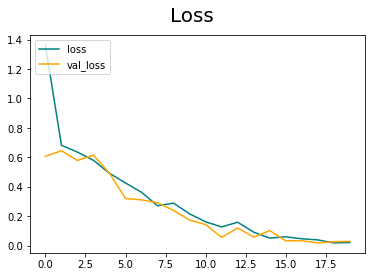

In [28]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

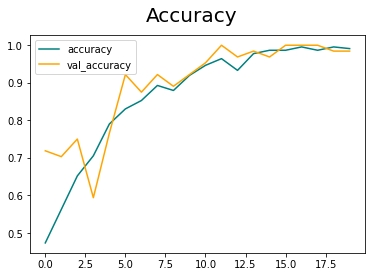

In [29]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# Evaluate

In [30]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [31]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 56ms/step


In [32]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


# Testing Model

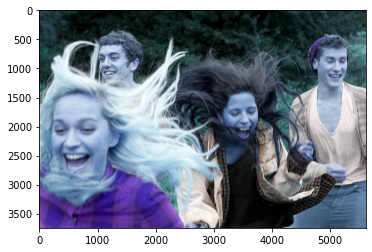

In [33]:
img = cv2.imread('IMAGE_TEST_PATH')
plt.imshow(img)
plt.show()

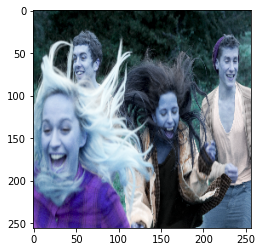

In [34]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [35]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 11ms/step


In [36]:
yhat

array([[0.52392006]], dtype=float32)

In [37]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Sad


# Save Training Model

In [38]:
model.save(os.path.join('models','MODEL_NAME.h5'))

In [39]:
new_model = load_model('MODEL_PATH')

In [40]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 32ms/step


array([[0.52392006]], dtype=float32)